In [1]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_with_labels.csv')

In [3]:
df

,image,class
0,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
1,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
2,/work1/niejep/SummerSchoolChallenge2022/fungii...,1
3,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
4,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
...,...,...
3739,/work1/niejep/SummerSchoolChallenge2022/fungii...,26
3740,/work1/niejep/SummerSchoolChallenge2022/fungii...,151
3741,/work1/niejep/SummerSchoolChallenge2022/fungii...,56
3742,/work1/niejep/SummerSchoolChallenge2022/fungii...,12


In [4]:
g = df.groupby('class')

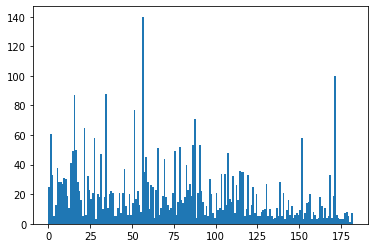

In [5]:
plt.hist(df['class'], bins=df['class'].max())
plt.show()

In [6]:
c = df['class'].to_numpy()

In [7]:
c_bins = np.bincount(c)

In [8]:
sort = np.argsort(c_bins)[::-1]

In [9]:
c_sorted = c_bins[sort]

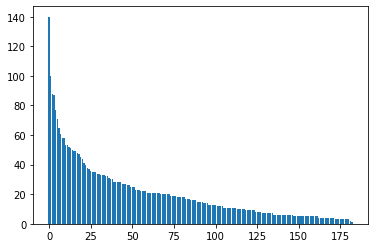

In [10]:
plt.bar(range(len(c_sorted)), c_sorted)
plt.show()

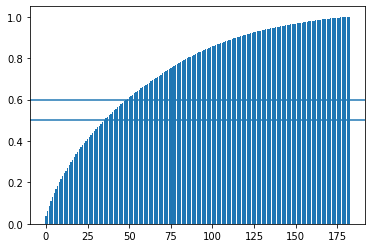

In [11]:
plt.bar(range(len(c_sorted)), np.cumsum(c_sorted) / len(df))
plt.axhline(0.5)
plt.axhline(0.6)
plt.show()

In [12]:
c[sort]

array([38, 56, 24,  6, 11, 58, 12,  0, 18, 84, 55, 57, 52, 44,  7,  5, 49,
       11, 21, 40, 42,  4, 55,  2, 24, 14, 65, 66, 39, 29, 56, 69,  1, 34,
       23, 14,  1,  1, 56, 34, 24,  1,  2,  8, 56,  1, 14, 42, 64, 72,  8,
        0, 55, 15, 43,  9, 26, 36, 10, 64, 30, 27, 19, 32, 17, 61, 56, 13,
       60, 25, 19, 73, 34, 47, 69,  3, 46, 20, 54, 88, 23, 47, 64, 16, 36,
       57, 53, 10, 41, 51, 55, 81,  5, 53,  2, 48, 37, 44, 71,  2, 63, 89,
       33, 59, 81, 15, 14, 14, 69,  3,  5, 21, 45, 41, 68, 22, 21, 10, 48,
       79, 75, 14, 62, 21, 74,  9, 67, 10, 15, 86, 14, 16,  6, 27, 31, 87,
       13, 31, 83, 35, 31, 59, 82, 70, 34, 80, 50, 42, 27, 11, 48, 76, 75,
       56, 67, 21, 64,  2,  9, 28, 29, 16, 43, 19, 11, 18, 13,  8,  0, 61,
       11, 11, 78, 85, 14, 90, 91, 86, 19, 77, 86, 92, 51], dtype=int64)

In [13]:
c_sorted

array([140, 100,  88,  87,  77,  71,  65,  61,  58,  58,  53,  53,  52,
        51,  50,  49,  49,  48,  47,  45,  44,  41,  40,  38,  37,  36,
        35,  35,  35,  34,  34,  33,  33,  33,  32,  32,  31,  30,  30,
        28,  28,  28,  28,  28,  27,  27,  27,  26,  26,  25,  25,  25,
        23,  23,  23,  22,  22,  22,  22,  21,  21,  21,  21,  21,  21,
        21,  21,  20,  20,  20,  20,  20,  20,  19,  19,  19,  19,  18,
        18,  18,  18,  18,  17,  17,  17,  16,  16,  16,  16,  15,  15,
        15,  15,  14,  14,  14,  13,  13,  13,  13,  13,  12,  12,  12,
        12,  11,  11,  11,  11,  11,  11,  11,  11,  10,  10,  10,  10,
        10,   9,   9,   9,   9,   9,   9,   8,   8,   8,   8,   7,   7,
         7,   7,   7,   7,   7,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   

In [14]:
data_sort = np.load('data_sort_new.npy')

In [15]:
# df = df.set_index('image')
df['image'] = df['image'].str.split('/').str[-1]
df

,image,class
0,2237852381-222754.JPG,0
1,2237852388-108.JPG,0
2,2237852964-74877.JPG,1
3,2237853192-298146.JPG,2
4,2237853950-148876.JPG,2
...,...,...
3739,2238231203-11132.JPG,26
3740,2238326715-159996.JPG,151
3741,2238329351-234166.JPG,56
3742,2238336059-86299.JPG,12


In [16]:
df_preds = pd.DataFrame({'image': data_sort['im_names'], 'pred': data_sort['pred_labels']})
df_preds['image'] = df_preds['image'].str.replace('/data/AIDatasets/fungi/DF20M/', '')

In [17]:
g = df_preds.groupby('pred')

In [18]:
g.describe()

image                                   
     count unique                    top freq
pred                                         
0      361    361  2237852360-148530.JPG    1
1      351    351   2237852204-74704.JPG    1
2      569    569  2237852116-222680.JPG    1
4        8      8    2237914483-2893.JPG    1
5       64     64  2237958711-226903.JPG    1
...    ...    ...                    ...  ...
170    435    435  2237887395-150908.JPG    1
171   1001   1001   2237854094-75098.JPG    1
172      8      8   2238351329-87027.JPG    1
177      2      2   2812984303-59059.JPG    1
181      1      1  2421822784-119401.JPG    1

[147 rows x 4 columns]

In [19]:
pred_count = g.count()

In [20]:
pred_counts = pred_count.sort_values('image', ascending=False).head(10)
pred_counts

,image
pred,
87,2092
107,2031
75,1526
67,1480
56,1258
130,1026
171,1001
34,995
15,895


<AxesSubplot:xlabel='pred'>

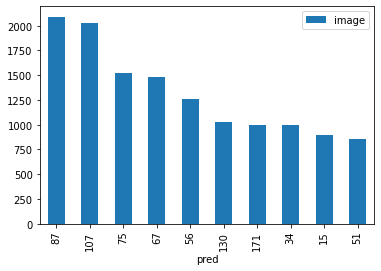

In [44]:
pred_counts.plot.bar()

In [22]:
df_all = pd.merge(df, df_preds, on='image')
df_all

,image,class,pred
0,2237852381-222754.JPG,0,10
1,2237852388-108.JPG,0,53
2,2237852964-74877.JPG,1,107
3,2237853192-298146.JPG,2,2
4,2237853950-148876.JPG,2,2
...,...,...,...
3739,2238231203-11132.JPG,26,87
3740,2238326715-159996.JPG,151,105
3741,2238329351-234166.JPG,56,56
3742,2238336059-86299.JPG,12,67


In [23]:
from sklearn import metrics

In [24]:
m = metrics.confusion_matrix(df_all['class'], df_all['pred'])

In [25]:
# np.where(m[142])

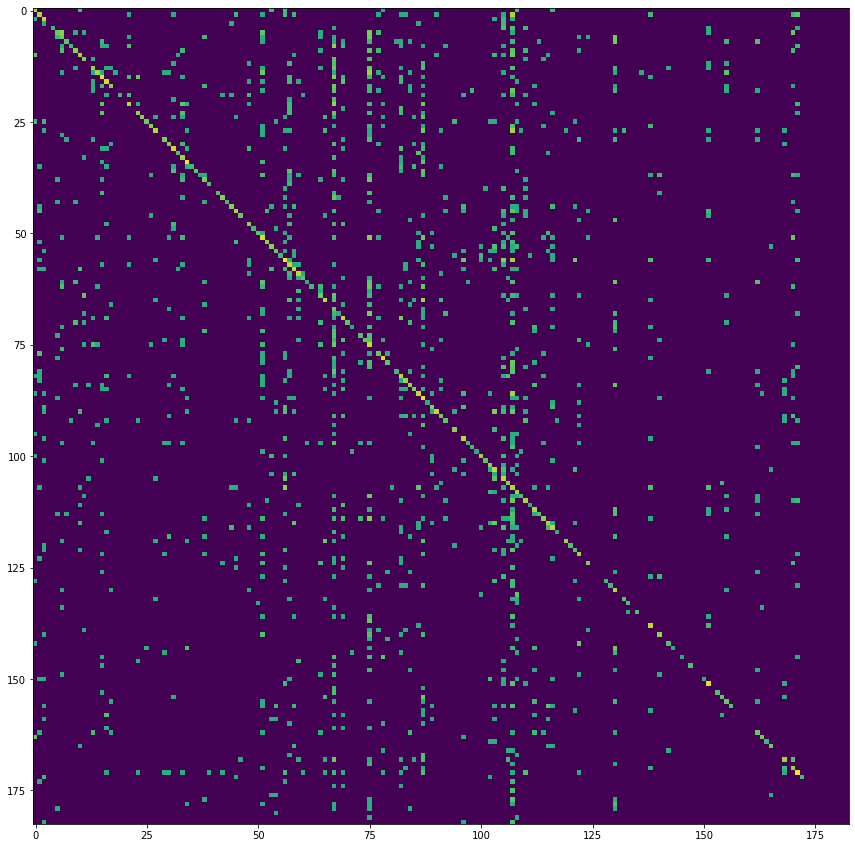

In [26]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.imshow(np.log(m + 0.0005))
plt.show()

C:\Users\nje\AppData\Local\Temp/ipykernel_26376/994953485.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.diagonal(m) / m.sum(0))


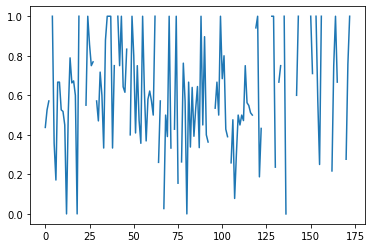

In [27]:
plt.plot(np.diagonal(m) / m.sum(0))

In [28]:
np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100

C:\Users\nje\AppData\Local\Temp/ipykernel_26376/3477649289.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100


107

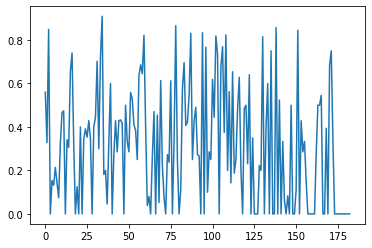

In [29]:
plt.plot(np.diagonal(m) / m.sum(1))

In [30]:
m[:, 67].sum()

184

In [31]:
m[:, 107].sum()

230

In [32]:
m[:, 75].sum()

193

In [33]:
m[:, 51].sum()

105

In [34]:
m[:, 56].sum()

143

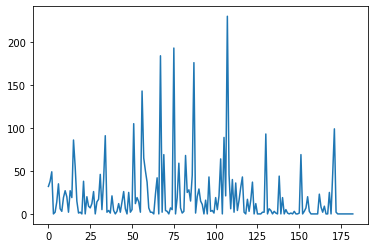

In [35]:
plt.plot(m.sum(0))

In [36]:
np.where(m.sum(0) > 50)

(array([ 15,  16,  34,  51,  56,  57,  67,  69,  75,  78,  82,  87, 103,
        105, 107, 130, 151, 171], dtype=int64),)

In [37]:
np.where(m.sum(0) / m.sum(1) > 10)

(array([67], dtype=int64),)

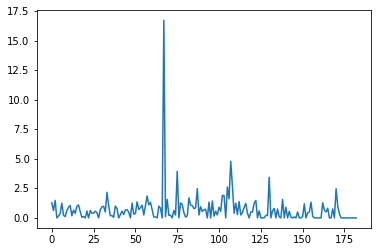

In [38]:
plt.plot(m.sum(0) / m.sum(1))

In [39]:
print(metrics.classification_report(df_all['class'], df_all['pred']))

              precision    recall  f1-score   support

           0       0.44      0.56      0.49        25
           1       0.53      0.33      0.40        61
           2       0.57      0.85      0.68        33
           3       0.00      0.00      0.00         5
           4       1.00      0.15      0.27        13
           5       0.36      0.13      0.19        38
           6       0.17      0.21      0.19        28
           7       0.67      0.14      0.24        28
           8       0.67      0.07      0.13        27
           9       0.53      0.32      0.40        31
          10       0.52      0.47      0.49        30
          11       0.45      0.47      0.46        19
          12       0.00      0.00      0.00        11
          13       0.52      0.34      0.41        41
          14       0.79      0.31      0.44        49
          15       0.66      0.66      0.66        87
          16       0.67      0.74      0.70        50
          17       0.60    

C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu